<a href="https://colab.research.google.com/github/Suyeon2021/testrepository/blob/main/HW2_%EB%B0%95%EC%88%98%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework2 

tidyverse 패키지를 사용하여 아래의 문제들을 풀어보도록 합시다. 

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data(diamonds)

In [ ]:
diamonds %>% head()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


### Q1 다이아몬드의 색에 따른 가격 분포를 알고싶습니다. ggplot 을 활용해 voilin 플롯, 박스플롯을 그려서 분포, 평균 등을 살펴보세요.

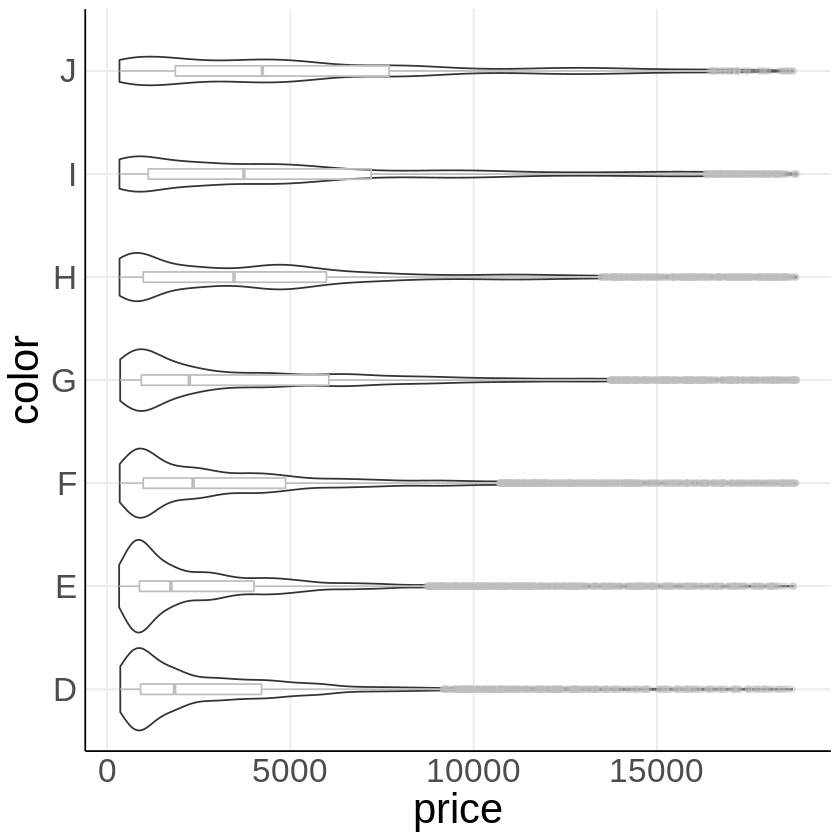

In [ ]:
ggplot(data = diamonds, mapping = aes(x = color, y = price)) + 
  geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2) + theme_minimal()+
  theme(axis.line= element_line(colour = "black"),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        text = element_text(size = 25), 
        ) +   coord_flip()

### Q2 dplyr 함수들을 사용하여, 다이아몬드의 색 별로 평균 분산을 구해보세요. (Hint: group_by, summarize 사용) 

In [ ]:
diamonds %>% group_by(color) %>% summarise(price_mean=mean(price, na.rm=TRUE),price_sd=sd(price,na.rm=TRUE))

color,price_mean,price_sd
<ord>,<dbl>,<dbl>
D,3169.954,3356.591
E,3076.752,3344.159
F,3724.886,3784.992
G,3999.136,4051.103
H,4486.669,4215.944
I,5091.875,4722.388
J,5323.818,4438.187


### Q3 가격이 5000 이하인 다이아몬드들에 대해서, 다이아몬드 색에 따른 가격의 평균과 분산 정보를 Bar plot으로 그려보세요 (bar plot 의 x축은 색, y축은 색에따른 평균가격). 해당 bar plot에 표준편차를 errorbar 로 나타내세요. (Hint: ggplot에서 geom_errorbar 사용)



In [ ]:
diamonds %>% filter(price<5000) %>% group_by(color) %>%  summarise(price_mean=mean(price, na.rm=TRUE),price_sd=sd(price,na.rm=TRUE),upper=price_mean+price_sd,lower=price_mean-price_sd)

color,price_mean,price_sd,upper,lower
<ord>,<dbl>,<dbl>,<dbl>,<dbl>
D,1844.580,1256.699,3101.279,587.8805
E,1799.859,1233.738,3033.597,566.1214
F,1951.724,1291.452,3243.176,660.2716
G,1779.262,1248.394,3027.657,530.8676
H,2078.287,1500.880,3579.167,577.4074
I,2082.618,1448.565,3531.183,634.0533
J,2288.456,1466.051,3754.507,822.4046


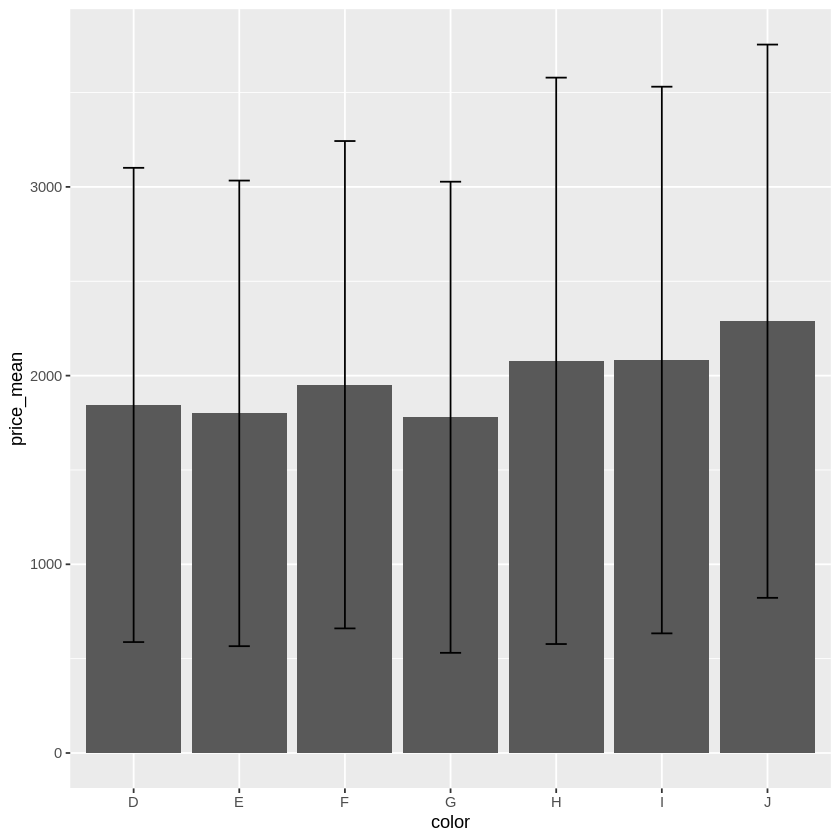

In [ ]:
diamonds %>% filter(price<5000) %>% group_by(color) %>%  summarise(price_mean=mean(price, na.rm=TRUE),price_sd=sd(price,na.rm=TRUE),upper=price_mean+price_sd,lower=price_mean-price_sd) %>%
ggplot(mapping = aes(x = color,y= price_mean)) + 
  geom_bar(stat="identity")+
geom_errorbar(aes(ymin=lower, ymax=upper), width=0.2)

